In [2]:
using JSON
using Plots
using StatsPlots
using Plots.PlotMeasures
using JLD2

In [3]:
pal = palette(:tab10);

# Load Python Results (CSDI, BRITS, CDREC)

In [76]:
cdrec_results = JSON.parsefile("Python/ipd_cdrec_results.json");
brits_results = JSON.parsefile("Python/ipd_brits_results.json");
csdi_results = JSON.parsefile("Python/ipd_csdi_results.json");

In [47]:
# per fold, per % missing
function extract_fold_pm(results::Dict, fold_idx::Int, pm::Int)
    """
    Extract errors for a given fold and percentage missing.
    Returns pooled errors across window locations, e.g., for 100 test instances,
    each evaluated for 5% missing data and 15 possible window locations,
    will return 1500 errors once pooled.
    """
    fold_marginalised = results["$fold_idx"]
    pm_marginalised = fold_marginalised["$pm"]
    window_iter_marginalised = [pm_marginalised["$i"] for i in 0:(length(pm_marginalised)-1)]
    # pool together results from all the window locs 
    window_pool = window_iter_marginalised[1]
    for i in 2:length(window_iter_marginalised)
        window_pool = vcat(window_pool, window_iter_marginalised[i])
    end
    return window_pool
end

extract_fold_pm (generic function with 1 method)

In [48]:
per_fold_5pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 5)) for f in 0:29])
per_fold_15pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 15)) for f in 0:29])
per_fold_25pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 25)) for f in 0:29])
per_fold_35pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 35)) for f in 0:29])
per_fold_45pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 45)) for f in 0:29])
per_fold_55pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 55)) for f in 0:29])
per_fold_65pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])
per_fold_75pt_csdi = mean([mean(extract_fold_pm(csdi_results, f, 65)) for f in 0:29])


0.350941509928928

In [49]:
per_pm_mean_all_folds_csdi = [mean([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_csdi = [std([mean(extract_fold_pm(csdi_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_csdi = 1.96 * per_pm_std_all_folds_csdi

10-element Vector{Float64}:
 0.028475263525068566
 0.02636776586561802
 0.02578864462781078
 0.024488948656428554
 0.024251055168324657
 0.02428527711277031
 0.024956627047169343
 0.025623863927803654
 0.026339124761779825
 0.02741115304571906

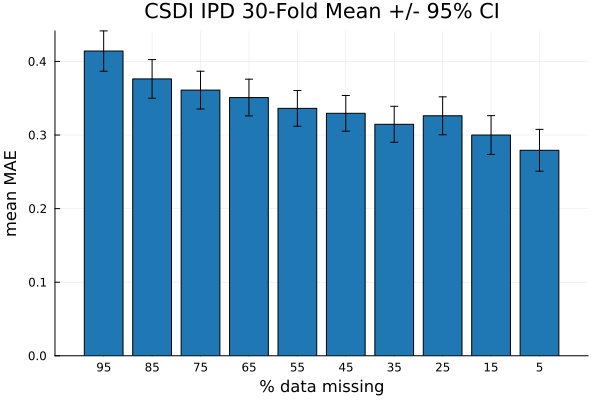

In [50]:
bar(per_pm_mean_all_folds_csdi, yerr=per_pm_95ci_all_folds_csdi, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CSDI IPD 30-Fold Mean +/- 95% CI", c=pal[1])
xflip!(true)    
#savefig("ipd_csdi_only.svg")

In [53]:
per_pm_mean_all_folds_brits = [mean([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_brits = [std([mean(extract_fold_pm(brits_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_brits = 1.96 * per_pm_std_all_folds_brits

10-element Vector{Float64}:
 0.034367327603021254
 0.04039930574745999
 0.033343896399873535
 0.03338817373852062
 0.03334981491483575
 0.034222102418494244
 0.03713287306282179
 0.041694907630309704
 0.04546307023840116
 0.04652229316111939

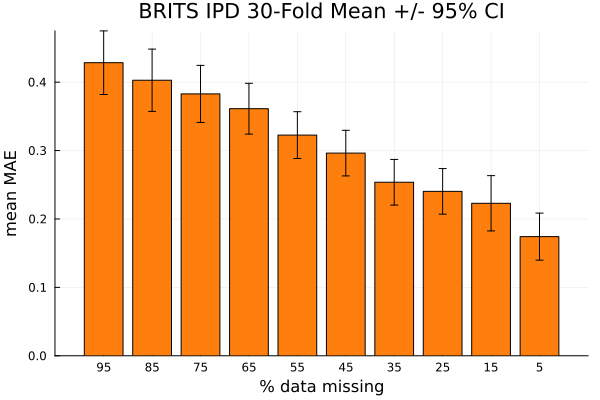

In [55]:
bar(per_pm_mean_all_folds_brits, yerr=per_pm_95ci_all_folds_brits, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="BRITS IPD 30-Fold Mean +/- 95% CI", c=pal[2])
xflip!(true)    
#savefig("ipd_brits_only.svg")

In [77]:
per_pm_mean_all_folds_cdrec = [mean([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]
per_pm_std_all_folds_cdrec = [std([mean(extract_fold_pm(cdrec_results, f, pm)) for f in 0:29]) for pm in 5:10:95]/sqrt(30)
per_pm_95ci_all_folds_cdrec = 1.96 * per_pm_std_all_folds_cdrec

10-element Vector{Float64}:
 0.0013386887685662488
 0.00896030971673855
 0.013732127812377972
 0.007233997814106386
 0.012837374716578023
 0.017841779824457345
 0.02795159516984981
 0.03918544585909274
 0.04506222774542572
 0.055040173315444106

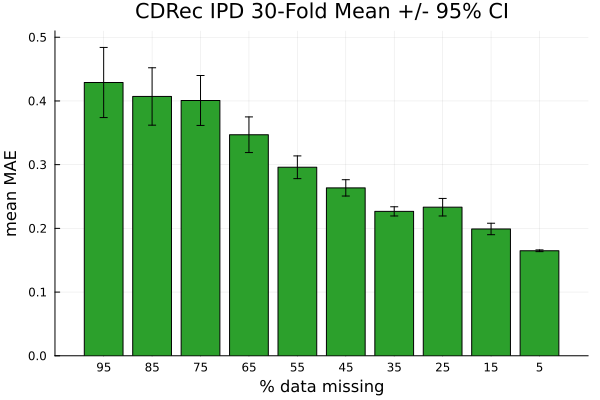

In [86]:
bar(per_pm_mean_all_folds_cdrec, yerr=per_pm_95ci_all_folds_cdrec, 
    xlabel="% data missing", label="", ylabel="mean MAE",
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    title="CDRec IPD 30-Fold Mean +/- 95% CI", c=pal[3],
    ylims=(0, 0.51))
xflip!(true)    
#savefig("ipd_cdrec_only.svg")

Combined 

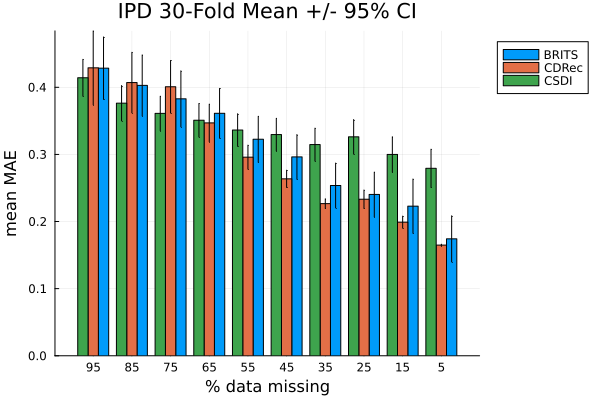

In [88]:
groupedbar([per_pm_mean_all_folds_brits per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi],
    yerr=[per_pm_95ci_all_folds_brits per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi],
    markersize=0,
    legend=:outertopright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "CDRec" "CSDI"], 
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("ipd_combined_impute.svg")

----

# MPS

In [89]:
f = jldopen("Julia/ipd_30fold_imputation_results_mac5sweep.jld2", "r");
mac_results_mps = read(f, "mps_results")
mac_results_nn = read(f, "nn_results")
close(f)

In [90]:
instances = length(mac_results_mps[5][1])
mps_per_pm_30fold_mean = [mean([mean([mean(mac_results_mps[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]
nn_per_pm_30fold_mean = [mean([mean([mean(mac_results_nn[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]
mps_per_pm_30fold_std_err = ([std([mean([mean(mac_results_mps[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]/sqrt(30))
nn_per_pm_30fold_std_err = ([std([mean([mean(mac_results_nn[pm][f][inst]) for inst in 1:instances]) for f in 1:30]) for pm in 1:10]/sqrt(30))
mps_per_pm_30fold_95ci = 1.96 * mps_per_pm_30fold_std_err;
nn_per_pm_30fold_95ci = 1.96 * nn_per_pm_30fold_std_err;

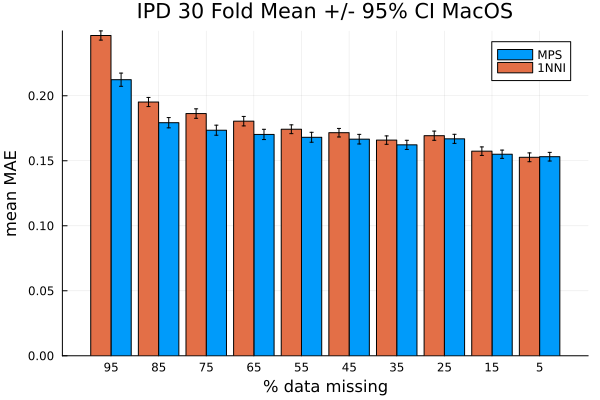

In [91]:
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean],
    yerr=[mps_per_pm_30fold_95ci nn_per_pm_30fold_95ci],
    markersize=2, 
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI"], 
    title="IPD 30 Fold Mean +/- 95% CI MacOS",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("ipd_30fold_mps_vs_nn.svg")

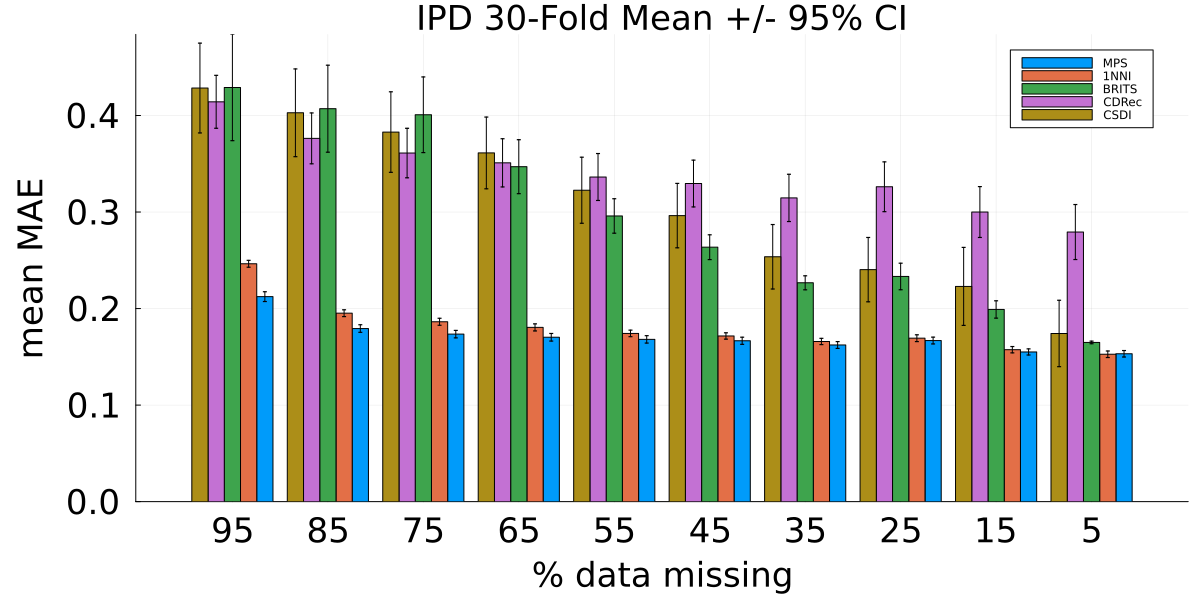

In [95]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean  per_pm_mean_all_folds_cdrec per_pm_mean_all_folds_csdi per_pm_mean_all_folds_brits],
    yerr=[mps_per_pm_30fold_95ci nn_per_pm_30fold_95ci  per_pm_95ci_all_folds_cdrec per_pm_95ci_all_folds_csdi per_pm_95ci_all_folds_brits],
    markersize=2,
    bar_width=0.85,
    legend=:topright, 
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1NNI" "BRITS" "CDRec" "CSDI"], 
    title="IPD 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1200, 600),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("IPD_results_final.svg")